In [8]:
import os
import sys
import time
import numpy as np
import torch
import utils
import argparse
import tifffile as t
import torch.backends.cudnn as cudnn
import torch.nn as nn
from torch.autograd import Variable
from IPython.display import Image as show
import cv2

from model import Network as Network

ROOT_PATH = os.getcwd()

# Load Model

In [10]:
# optimised weight
weights = "./final_model/opt_weights.pt"
torch.cuda.set_device(1)
cudnn.enabled=False
model = torch.load(weights).cuda()

In [12]:
target_x = np.load('E:/URBAN_DATASET_BGH/val_x.npy')
target_y = np.load('E:/URBAN_DATASET_BGH/val_y.npy')
target_x = target_x.swapaxes(2,3).swapaxes(1,2)
target_y = target_y.swapaxes(2,3).swapaxes(1,2)

# Choose a tile to predict

In [13]:
TILE_NO = 57

In [14]:
target = target_x[TILE_NO].astype(np.float)
c, h, w = target.shape
target = target.reshape((1, c, h, w))
label = target_y[TILE_NO]
label = label.reshape((1, 1, h, w))

In [15]:
np.unique(label, return_counts=True)

(array([0, 1], dtype=uint16), array([126330, 135814], dtype=int64))

# Make prediction

In [16]:
input = torch.tensor(target)
input = Variable(input).cuda().float()
logits = model(input)
mask = (logits > 0.5).int()

In [17]:
mask = mask.cpu().numpy() *255
mask = mask.reshape(mask.shape[1],mask.shape[2],mask.shape[3])
mask = mask.swapaxes(0,1).swapaxes(1,2)
print(np.unique(mask, return_counts=True))

(array([0]), array([262144], dtype=int64))


In [18]:
label = label *255
label = label.reshape(label.shape[1],label.shape[2],label.shape[3])
label = label.swapaxes(0,1).swapaxes(1,2)

# Show predictions

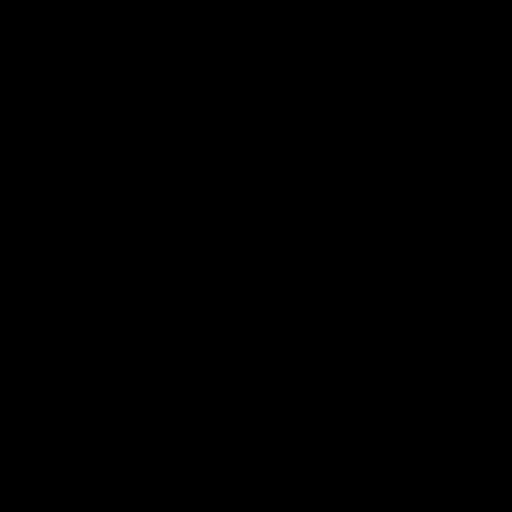

In [19]:
cv2.imwrite('preds02.jpg', mask)
show('preds02.jpg')

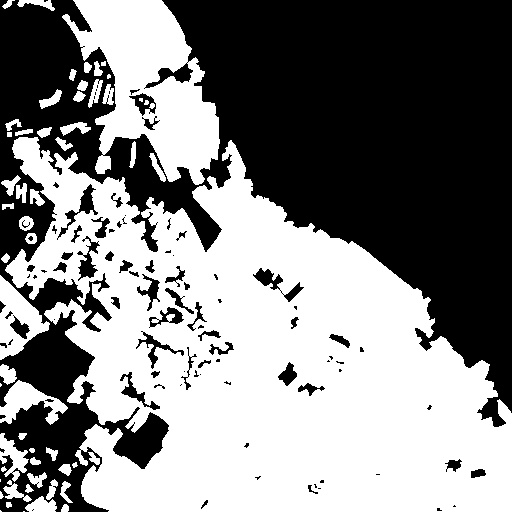

In [20]:
cv2.imwrite('label.jpg',label)
show('label.jpg')